In [1]:
import pandas as pd
admit = pd.read_csv('Admission_Predict.csv')
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


- Serial No.: ma thi sinh
- GRE Score: diem GRE
- TOEFL Score: diem TOELF
- University Rating: diem University
- SOP: Statement of Purpose (scale from 1 to 5)
- LOR: Letter of Recommendation (scale from 1 to 5)
- CGPA: diem tot nghiep Dai hoc
- Chance of Admit : co hoi duoc trung tuyen

In [2]:
# Tim mo hinh du bao cho Chance of Admit bang softmax regression
#check xem mo hinh du bao nhu the nao?
#chia Chance of Admit ra lam 3 loai
# <50% -> 0 (fail)
# >=50% and <80% (potential admited)
# >=80% (higly admited)

In [3]:
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admit.rename(columns={'Serial No.':'serial','GRE Score':'gre_score','TOEFL Score':'toefl_score',\
                     'University Rating':'uni_rating','Research':'res','Chance of Admit ':'chance'},inplace=True)
admit.head()

,serial,gre_score,toefl_score,uni_rating,SOP,LOR,CGPA,res,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<AxesSubplot:>

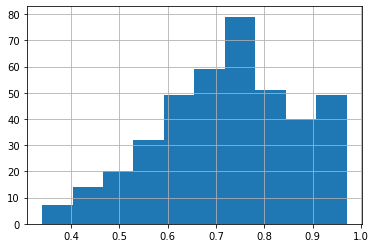

In [5]:
admit.chance.hist()

In [6]:
c = []
for q in admit['chance'].values:
    if q < 0.5:
        c.append(0) #fail
    elif q >= 0.8:
        c.append(2) #highly admitted
    else:
        c.append(1) #potential admitted
    
admit['category'] = c
admit.head()

,serial,gre_score,toefl_score,uni_rating,SOP,LOR,CGPA,res,chance,category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,2
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,2
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [7]:
from sklearn.preprocessing import StandardScaler
X = admit[admit.columns[1:8]].values
y = admit['category'].values

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [9]:
dataStan = pd.DataFrame(data = Xstan, columns = admit.columns[1:8])
dataStan['category'] = y
dataStan.head()

,gre_score,toefl_score,uni_rating,SOP,LOR,CGPA,res,category
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,2
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,2
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,1


In [10]:
from sklearn.linear_model import LogisticRegression
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs') 
softReg.fit(Xstan, y)

LogisticRegression(multi_class='multinomial')

In [11]:
softReg.intercept_

array([-2.14822443,  2.39635934, -0.24813491])

In [12]:
softReg.coef_

array([[-0.47282487, -0.94178174,  0.20599528,  0.35757275, -0.57262823,
        -2.04774355, -0.26424957],
       [-0.04507155, -0.067962  , -0.39383524, -0.20956623,  0.2091326 ,
        -0.20942917, -0.21753435],
       [ 0.51789642,  1.00974375,  0.18783997, -0.14800653,  0.36349563,
         2.25717272,  0.48178392]])

In [13]:
yhat = softReg.predict(Xstan)
dataStan['predict'] = yhat
dataStan[['category','predict']]

,category,predict
0,2,2
1,1,2
2,1,1
3,2,1
4,1,1
...,...,...
395,2,2
396,2,2
397,2,2
398,1,1


<AxesSubplot:>

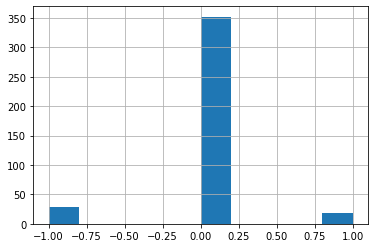

In [14]:
residuals = dataStan['category'] - dataStan['predict']
residuals.hist()

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
C = confusion_matrix(dataStan['category'].values, yhat)
confusionMatrix = pd.DataFrame(data = C, index = ['fail(0),true','potential_admitted(1),true','highly_admitted(2),true'],
                             columns = ['fail(0),predicted','potential_admitted(1),predicted','highly_admitted(2),predicted'])
confusionMatrix.loc['sum'] = confusionMatrix.sum()
confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
confusionMatrix

,"fail(0),predicted","potential_admitted(1),predicted","highly_admitted(2),predicted",sum
"fail(0),true",16,17,0,33
"potential_admitted(1),true",4,223,12,239
"highly_admitted(2),true",0,15,113,128
sum,20,255,125,400


Text(83.40000000000006, 0.5, 'true value')

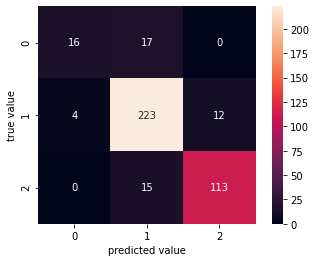

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(dataStan['category'].values, yhat)
sns.heatmap(C,square=True,fmt='d',annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [17]:
#danh gia: mo hinh du bao yếu với loại fail, dự báo tốt với chance admitted và highly admitted
#ko tách ra train và test: vì nếu tách ra train và test, type_admit = 0 có quá ít data point để train

In [18]:
print(classification_report(dataStan['category'].values,yhat))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60        33
           1       0.87      0.93      0.90       239
           2       0.90      0.88      0.89       128

    accuracy                           0.88       400
   macro avg       0.86      0.77      0.80       400
weighted avg       0.88      0.88      0.88       400

